In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
import statsmodels.formula.api as smf
#import pyreadr

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
#data_proyecto = pyreadr.read_r('data_encriptada.rds')

# Extraer el DataFrame contenido
#data_proyecto = data_proyecto[None]  # Usualmente el objeto principal está bajo la clave None
data_proyecto = pd.read_csv("C:/Users/Usuario/Desktop/UCR/CA-0417 Riesgos en Entidades Financieras I/Proyecto-Riesgo-/datos.csv")

data_proyecto

,IDENTIFICADOR,y_rango,y_dicotomica,x4,x5,x6,x7,x8,x9,x10,...,x103,x104,x105,x106,x107,x108,x109,x1,x2,x3
0,100913.0,y_0,0,2021-08-31,1,S,C,932.0,True,4.940656e-324,...,NaN,NaN,NaN,187313.297258,83616.305251,0.284405,0.357849,6151.726167,19.0,119255.573915
1,99176.0,y_30,0,2021-05-31,1,S,C,828.0,True,0.000000e+00,...,NaN,NaN,NaN,164352.312433,127734.957850,0.246262,0.309129,9591.393465,1.0,37411.199713
2,107305.0,y_30,0,2022-05-31,0,S,C,868.0,True,4.940656e-324,...,0.0,21.0,21.0,112131.529063,80433.365550,0.423221,0.467257,11251.425064,1.0,33641.425657
3,107539.0,y_30,0,2022-05-31,1,N,C,891.0,True,4.940656e-324,...,0.0,60.0,60.0,374626.594517,187313.297258,0.340834,0.360938,10138.006103,0.0,69805.958238
4,97503.0,y_30,0,2021-03-31,1,M,C,927.0,False,4.940656e-324,...,NaN,NaN,NaN,482180.681329,399735.279859,0.468886,0.589293,28548.623991,0.0,70557.339480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,96263.0,y_30,0,2021-02-28,0,M,C,978.0,False,4.940656e-324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,181157.899713
2319,96136.0,y_30,0,2021-02-28,1,M,C,924.0,False,4.940656e-324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,107827.161102
2320,96805.0,y_30,0,2021-02-28,1,M,C,828.0,False,0.000000e+00,...,NaN,NaN,NaN,114804.924126,89226.624968,0.459019,0.623195,18101.531467,1.0,46306.244967
2321,105061.0,y_30,0,2022-03-31,0,S,C,794.0,True,0.000000e+00,...,NaN,NaN,NaN,241694.577107,187845.526249,0.323695,0.340907,12605.183419,0.0,41210.746430


In [4]:
# Lista de las variables que deseas modificar
variables = ['x10', 'x13', 'x23', 'x32', 'x36', 'x44', 'x47', 'x48', 
             'x56', 'x57', 'x58', 'x59', 'x60', 'x67', 'x68', 'x68', 'x2']

# Crear un diccionario para almacenar el número de categorías por variable
num_categorias = {}

# Iterar sobre las variables y asignar categorías
for var in variables:
    # Reemplazar 'ND' por NaN (valor faltante)
    data_proyecto[var] = data_proyecto[var].replace('ND', np.nan)
    
    # Obtener los valores únicos de la variable, ignorando NaN
    unique_values = data_proyecto[var].dropna().unique()
    
    # Ordenar los valores únicos
    unique_values = sorted(unique_values)
    
    # Crear un diccionario de mapeo de valores a categorías
    value_to_category = {val: i+1 for i, val in enumerate(unique_values)}
    
    # Asegurar que la categoría 0 esté incluida
    value_to_category[np.nan] = 0  # Añadir la categoría para NaN (Desconocido)
    
    # Asignar las categorías a la variable
    data_proyecto[f'cat_{var}'] = data_proyecto[var].map(value_to_category)
    
    # Convertir a tipo categórico
    data_proyecto[f'cat_{var}'] = data_proyecto[f'cat_{var}'].astype('category')
    
    # Guardamos el número de categorías para cada variable
    num_categorias[var] = len(unique_values) + 1  # +1 por la categoría 'Desconocido'

# Imprimir cuántas categorías se asignaron a cada variable
print("\nNúmero de categorías por variable:")
print(num_categorias)

# Mostrar el dataframe con las nuevas columnas
data_proyecto




Número de categorías por variable:
{'x10': 14, 'x13': 13, 'x23': 6, 'x32': 4, 'x36': 49, 'x44': 6, 'x47': 9, 'x48': 7, 'x56': 7, 'x57': 4, 'x58': 4, 'x59': 12, 'x60': 19, 'x67': 5, 'x68': 5, 'x2': 25}


,IDENTIFICADOR,y_rango,y_dicotomica,x4,x5,x6,x7,x8,x9,x10,...,cat_x47,cat_x48,cat_x56,cat_x57,cat_x58,cat_x59,cat_x60,cat_x67,cat_x68,cat_x2
0,100913.0,y_0,0,2021-08-31,1,S,C,932.0,True,4.940656e-324,...,7,2,1,1,1,1,6,1,1,20
1,99176.0,y_30,0,2021-05-31,1,S,C,828.0,True,0.000000e+00,...,5,1,1,1,1,1,1,1,1,2
2,107305.0,y_30,0,2022-05-31,0,S,C,868.0,True,4.940656e-324,...,6,2,1,1,2,2,3,1,1,2
3,107539.0,y_30,0,2022-05-31,1,N,C,891.0,True,4.940656e-324,...,6,2,1,1,1,2,2,1,1,1
4,97503.0,y_30,0,2021-03-31,1,M,C,927.0,False,4.940656e-324,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,96263.0,y_30,0,2021-02-28,0,M,C,978.0,False,4.940656e-324,...,0,0,0,0,0,0,0,1,0,5
2319,96136.0,y_30,0,2021-02-28,1,M,C,924.0,False,4.940656e-324,...,0,0,0,0,0,0,0,1,0,3
2320,96805.0,y_30,0,2021-02-28,1,M,C,828.0,False,0.000000e+00,...,0,0,0,0,0,0,0,1,0,2
2321,105061.0,y_30,0,2022-03-31,0,S,C,794.0,True,0.000000e+00,...,5,1,1,1,1,1,1,1,1,1


In [5]:
# Lista de las variables que deseas modificar
variables = ['x10', 'x13', 'x23', 'x32', 'x36', 'x44', 'x47', 'x48', 
             'x56', 'x57', 'x58', 'x59', 'x60', 'x67', 'x68', 'x68', 'x2']

# Iterar sobre las variables y crear los dataframes con la columna original y categorizada
for var in variables:
    # Crear el dataframe para la variable con las dos columnas (original y categorizada)
    revisa = data_proyecto[[f'cat_{var}', var]].copy()
    
    # Mostrar las primeras 20 filas del dataframe
    print(f"Primeras 20 filas de {var}:")
    print(revisa.head(20))
    print("\n" + "-"*50)  # Separador para facilitar la lectura

Primeras 20 filas de x10:
   cat_x10            x10
0        2  4.940656e-324
1        1   0.000000e+00
2        2  4.940656e-324
3        2  4.940656e-324
4        2  4.940656e-324
5        2  4.940656e-324
6        1   0.000000e+00
7        2  4.940656e-324
8        1   0.000000e+00
9        1   0.000000e+00
10       1   0.000000e+00
11       1   0.000000e+00
12       2  4.940656e-324
13       1   0.000000e+00
14       2  4.940656e-324
15       2  4.940656e-324
16       3  9.881313e-324
17       2  4.940656e-324
18       1   0.000000e+00
19       1   0.000000e+00

--------------------------------------------------
Primeras 20 filas de x13:
   cat_x13            x13
0        2  4.940656e-324
1        1   0.000000e+00
2        1   0.000000e+00
3        1   0.000000e+00
4        2  4.940656e-324
5        1   0.000000e+00
6        1   0.000000e+00
7        1   0.000000e+00
8        1   0.000000e+00
9        1   0.000000e+00
10       1   0.000000e+00
11       1   0.000000e+00
12       1  

In [6]:
columnas_especificas = ['x8', 'x11', 'x12', 'x14', 'x15', 'x31', 'x33', 'x34', 
                        'x35', 'x40', 'x42', 'x51', 'x52', 'x53', 'x54', 'x55', 
                        'x61', 'x65', 'x69', 'x70', 'x71', 'x74', 'x75']

# Rellenar valores NA con la media solo en las columnas específicas si son numéricas
for columna in columnas_especificas:
    if pd.api.types.is_numeric_dtype(data_proyecto[columna]):
        media = data_proyecto[columna].mean()  # Calcula la media de la columna
        data_proyecto[columna].fillna(media, inplace=True)  # Rellena los NA con la media

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9864\1120422500.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_proyecto[columna].fillna(media, inplace=True)  # Rellena los NA con la media


In [7]:
datos_limpios_de_na = data_proyecto[['x8', 'x11', 'x12', 'x14', 'x15', 'x31', 'x33', 'x34', 
                        'x35', 'x40', 'x42', 'x51', 'x52', 'x53', 'x54', 'x55', 
                        'x61', 'x65', 'x69', 'x70', 'x71', 'x74', 'x75','cat_x10', 'cat_x13', 'cat_x23', 'cat_x32', 'cat_x36', 'cat_x44', 'cat_x47', 'cat_x48', 
             'cat_x56', 'cat_x57', 'cat_x58', 'cat_x59', 'cat_x60', 'cat_x67', 'cat_x68', 'cat_x68', 'cat_x2']].copy()




datos_limpios_de_na

,x8,x11,x12,x14,x15,x31,x33,x34,x35,x40,...,cat_x48,cat_x56,cat_x57,cat_x58,cat_x59,cat_x60,cat_x67,cat_x68,cat_x68,cat_x2
0,932.0,4135.239559,41269.186417,23199.002121,157088.053130,0.0,0.956862,4.940656e-324,0.000000e+00,18984.214667,...,2,1,1,1,1,6,1,1,1,20
1,828.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,7.410985e-323,0.000000,...,1,1,1,1,1,1,1,1,1,2
2,868.0,9965.394903,99453.425637,0.000000,0.000000,0.0,1.000000,0.000000e+00,0.000000e+00,2203.238803,...,2,1,1,2,2,3,1,1,1,2
3,891.0,14286.986459,142582.382258,0.000000,0.000000,0.0,1.000000,1.482197e-323,0.000000e+00,3158.694989,...,2,1,1,1,2,2,1,1,1,1
4,927.0,14897.806895,148678.295702,34.423622,233.093633,0.0,1.000000,0.000000e+00,1.333977e-322,3320.553583,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,978.0,24910.529289,248604.043930,42228.128232,197237.010143,0.0,1.000000,0.000000e+00,0.000000e+00,38399.398278,...,0,0,0,0,0,0,1,0,0,5
2319,924.0,4240.247431,42317.152167,27201.797626,123778.404428,0.0,0.956862,4.940656e-324,7.410985e-323,22125.252355,...,0,0,0,0,0,0,1,0,0,3
2320,828.0,0.000000,0.000000,30087.924433,203735.205819,0.0,1.000000,0.000000e+00,0.000000e+00,23435.816488,...,0,0,0,0,0,0,1,0,0,2
2321,794.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.964394e-323,2.964394e-323,0.000000,...,1,1,1,1,1,1,1,1,1,1


In [25]:
datos_limpios_de_na = data_proyecto[['x8', 'x11', 'x12', 'x14', 'x15', 'x31', 'x33', 'x34', 
                        'x35', 'x40', 'x42', 'x51', 'x52', 'x53', 'x54', 'x55', 
                        'x61', 'x65', 'x69', 'x70', 'x71', 'x74', 'x75','cat_x10', 'cat_x13', 'cat_x23', 'cat_x32', 'cat_x36', 'cat_x44', 'cat_x47', 'cat_x48', 
             'cat_x56', 'cat_x57', 'cat_x58', 'cat_x59', 'cat_x60', 'cat_x67', 'cat_x68', 'cat_x68', 'cat_x2',
             'x9', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x37', 'x41', 'y_dicotomica']].copy()


datos_limpios_de_na = datos_limpios_de_na.dropna()
datos_limpios_de_na

,x8,x11,x12,x14,x15,x31,x33,x34,x35,x40,...,x24,x25,x26,x27,x28,x29,x30,x37,x41,y_dicotomica
0,932.0,4135.239559,41269.186417,23199.002121,157088.053130,0.0,0.956862,4.940656e-324,0.000000e+00,18984.214667,...,False,False,False,False,False,False,False,True,False,0
1,828.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,7.410985e-323,0.000000,...,False,False,False,False,False,False,False,False,False,0
2,868.0,9965.394903,99453.425637,0.000000,0.000000,0.0,1.000000,0.000000e+00,0.000000e+00,2203.238803,...,False,False,False,False,False,False,False,True,False,0
3,891.0,14286.986459,142582.382258,0.000000,0.000000,0.0,1.000000,1.482197e-323,0.000000e+00,3158.694989,...,False,False,False,False,False,False,False,False,False,0
4,927.0,14897.806895,148678.295702,34.423622,233.093633,0.0,1.000000,0.000000e+00,1.333977e-322,3320.553583,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,978.0,24910.529289,248604.043930,42228.128232,197237.010143,0.0,1.000000,0.000000e+00,0.000000e+00,38399.398278,...,False,False,False,False,False,False,False,False,False,0
2319,924.0,4240.247431,42317.152167,27201.797626,123778.404428,0.0,0.956862,4.940656e-324,7.410985e-323,22125.252355,...,False,False,False,False,False,False,False,False,False,0
2320,828.0,0.000000,0.000000,30087.924433,203735.205819,0.0,1.000000,0.000000e+00,0.000000e+00,23435.816488,...,False,False,False,False,False,False,False,False,False,0
2321,794.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.964394e-323,2.964394e-323,0.000000,...,False,False,False,False,False,False,False,False,False,0


Generar doomies

In [ ]:
# Convertierte columnas categóricas a variables dummy
df_dummies = pd.get_dummies(datos_limpios_de_na, drop_first=True)  # drop_first evita la multicolinealidad

X = df_dummies.drop(columns=['y_dicotomica'], errors='ignore')  # Elimina la columna objetivo si existe
y = df_dummies['y_dicotomica'] if 'y_dicotomica' in df_dummies.columns else None

Centrar y reducir los datos

In [27]:
# Centrar y reducir las variables (escalar los datos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Centra y reduce las variables

PCA inicial

In [28]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [30]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
n_componentes = np.argmax(varianza_acumulada >= 0.8) + 1  # Número mínimo para alcanzar el 90%

print(f'Número de componentes necesarias: {n_componentes}')


Número de componentes necesarias: 110


PCA óptimo para explicar la varianza

In [31]:
# Recalcular PCA con el número óptimo de componentes
pca_optimo = PCA(n_components = n_componentes)
X_pca = pca_optimo.fit_transform(X_scaled)

In [32]:
# Coordenadas de las variables en el espacio del ACP
loadings = pca_optimo.components_.T

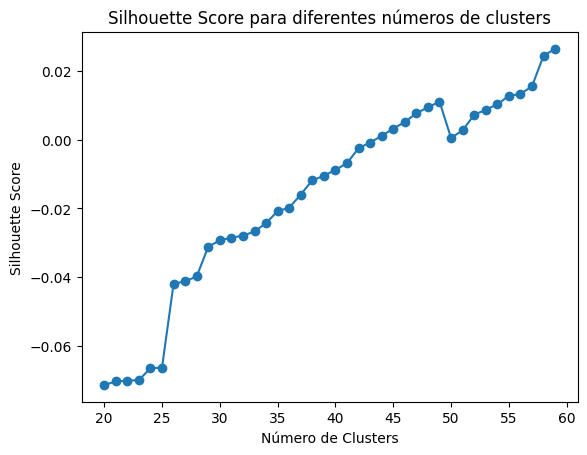

El número óptimo de clusters es 59


In [ ]:
# Realizar el clustering jerárquico con el método 'ward'
Z = linkage(X_scaled, method='ward')

sil_scores = []  # Lista para almacenar los Silhouette Scores

# Probar diferentes cantidades de clusters (por ejemplo, de 20 a 60 clusters)
for k in range(20, 60):
    clusters = fcluster(Z, k, criterion='maxclust')  # Asignar los clusters
    score = silhouette_score(X_scaled, clusters)  # Calcular el Silhouette Score
    sil_scores.append(score)

# Graficar los resultados del Silhouette Score
import matplotlib.pyplot as plt

plt.plot(range(20, 60), sil_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.show()

# Encontrar el número óptimo de clusters
optimal_k = np.argmax(sil_scores) + 20  # +20 porque comenzamos en 20 clusters
print(f"El número óptimo de clusters es {optimal_k}")

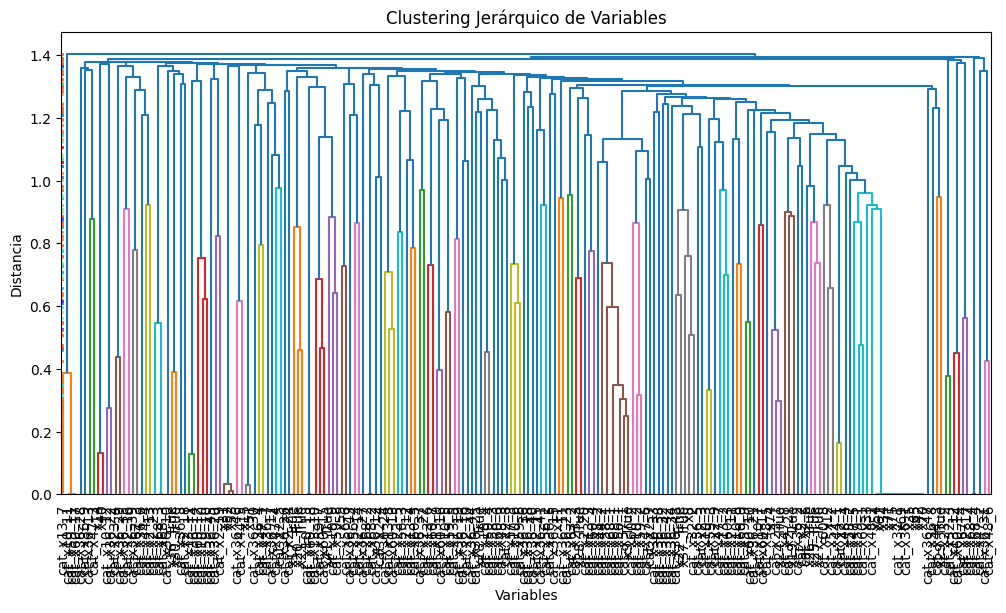

In [34]:
# Crear un DataFrame con las coordenadas
loadings_data_proyecto = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_componentes)], index=X.columns)

# Crear un DataFrame con las coordenadas
loadings_data_proyecto = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_componentes)], index=X.columns)

# Clustering jerárquico
linkage_matrix = linkage(loadings_data_proyecto, method='ward', metric='euclidean')

# Cortar el dendrograma para obtener mejor número de clusters
clusters = fcluster(linkage_matrix, t=optimal_k, criterion='maxclust')

# Dendrograma con no_labels=False para que aparezcan las etiquetas
plt.figure(figsize=(12, 6))
dendro = dendrogram(linkage_matrix, labels=loadings_data_proyecto.index, leaf_rotation=90, leaf_font_size=10, no_labels=False)

# Asignar colores a las ramas según los clusters
for i, d in enumerate(dendro['dcoord']):
    cluster_id = clusters[i]
    # Usamos la distancia para colorear las ramas según el cluster
    color = plt.cm.rainbow(cluster_id / optimal_k)  # Escala de color para los clusters
    plt.plot(d[0:2], [d[1]]*2, color=color, lw=2)  # Primera parte de la rama
    plt.plot(d[2:4], [d[3]]*2, color=color, lw=2)  # Segunda parte de la rama

plt.title('Clustering Jerárquico de Variables')
plt.xlabel('Variables')
plt.ylabel('Distancia')
plt.show()

In [38]:
cluster_assignment = pd.DataFrame({
    'Variable': loadings_data_proyecto.index,  # El índice contiene los nombres de las variables
    'Cluster': clusters
})

# Ver las asignaciones de clústeres
print(cluster_assignment)

     Variable  Cluster
0          x8       51
1         x11       47
2         x12       51
3         x14        5
4         x15       22
..        ...      ...
209  x28_True       49
210  x29_True       52
211  x30_True       12
212  x37_True       51
213  x41_True       29

[214 rows x 2 columns]


In [39]:
# Agrupar las variables por su cluster
clustered_vars = cluster_assignment.groupby('Cluster')['Variable'].apply(list)

In [41]:
# Obtener las cargas del PCA (ya las tienes en loadings_data_proyecto)
# Y las varianzas explicadas por cada componente (pca_optimo.explained_variance_ratio_)
varianza_explicada = pca_optimo.explained_variance_ratio_

# Crear un DataFrame para almacenar el aporte de cada variable a la varianza total
aporte_varianza_cluster = pd.DataFrame(index=loadings_data_proyecto.index)
# Crear un diccionario para almacenar los datos temporalmente
nuevas_columnas = {}

for pc in loadings_data_proyecto.columns:  # Itera sobre las columnas del DataFrame
    nuevas_columnas[pc] = (loadings_data_proyecto[pc] ** 2) * varianza_explicada[int(pc[2]) - 1]

# Combina las nuevas columnas con el DataFrame original
nuevas_columnas_df = pd.DataFrame(nuevas_columnas)
aporte_varianza_cluster = pd.concat([aporte_varianza_cluster, nuevas_columnas_df], axis=1)

Selección de variables menos correlacionadas con mayor capacidad de explicación de la varianza de las componentes

In [47]:
# Inicializamos un diccionario para almacenar la variable más relevante para cada cluster
top_vars_per_cluster = {}

# Iterar sobre cada cluster
for cluster_id in clustered_vars.index:
    # Seleccionamos las variables de este cluster
    variables_in_cluster = clustered_vars[cluster_id]
    
    # Filtramos el DataFrame para las variables del cluster actual
    vars_in_cluster = aporte_varianza_cluster.loc[variables_in_cluster]
    
    # Calculamos el aporte ponderado
    aporte_ponderado = vars_in_cluster.mul(varianza_explicada[:vars_in_cluster.shape[1]], axis=1)
    
    # Calculamos el aporte total ponderado para cada variable
    vars_in_cluster['Aporte_total'] = aporte_ponderado.sum(axis=1)
    
    # Ordenamos las variables por su aporte total
    top_vars = vars_in_cluster.sort_values('Aporte_total', ascending=False)
    
    # Seleccionamos la variable que más explica la varianza en este cluster
    top_vars_per_cluster[cluster_id] = top_vars.index[0]  # Elegimos solo la primera

# Mostrar las variables más relevantes por cluster
for cluster_id, top_var in top_vars_per_cluster.items():
    print(f"Cluster {cluster_id}: {top_var}")

Cluster 1: cat_x60_17
Cluster 2: cat_x36_13
Cluster 3: cat_x36_9
Cluster 4: cat_x36_28
Cluster 5: x40
Cluster 6: cat_x10_12
Cluster 7: cat_x36_29
Cluster 8: cat_x36_35
Cluster 9: cat_x36_39
Cluster 10: cat_x36_6
Cluster 11: cat_x68_3
Cluster 12: x16_True
Cluster 13: cat_x36_3
Cluster 14: cat_x2_18
Cluster 15: cat_x36_10
Cluster 16: cat_x13_11
Cluster 17: cat_x60_12
Cluster 18: cat_x36_20
Cluster 19: cat_x36_45
Cluster 20: x53
Cluster 21: cat_x36_46
Cluster 22: x15
Cluster 23: cat_x36_4
Cluster 24: cat_x36_17
Cluster 25: cat_x36_26
Cluster 26: cat_x2_24
Cluster 27: x21_True
Cluster 28: cat_x60_18
Cluster 29: cat_x60_15
Cluster 30: x55
Cluster 31: cat_x56_4
Cluster 32: cat_x68_2
Cluster 33: cat_x2_4
Cluster 34: cat_x36_27
Cluster 35: cat_x60_13
Cluster 36: cat_x60_5
Cluster 37: cat_x2_22
Cluster 38: cat_x13_9
Cluster 39: cat_x13_5
Cluster 40: cat_x36_16
Cluster 41: cat_x59_4
Cluster 42: cat_x36_44
Cluster 43: cat_x10_6
Cluster 44: cat_x36_18
Cluster 45: cat_x56_2
Cluster 46: cat_x36_15
C

### Separación de muestras

In [ ]:
vars_x = ['NumCuentas', 'Comportamiento','Ingreso','EdadCat']
X_train, X_test, y_train, y_test = train_test_split(dfData[vars_x], dfData['malo'], test_size=0.3, random_state=42)

### Procesadores de datos